[3.12559263 0.15401818]
0.20307668716659005
11387036868.698635


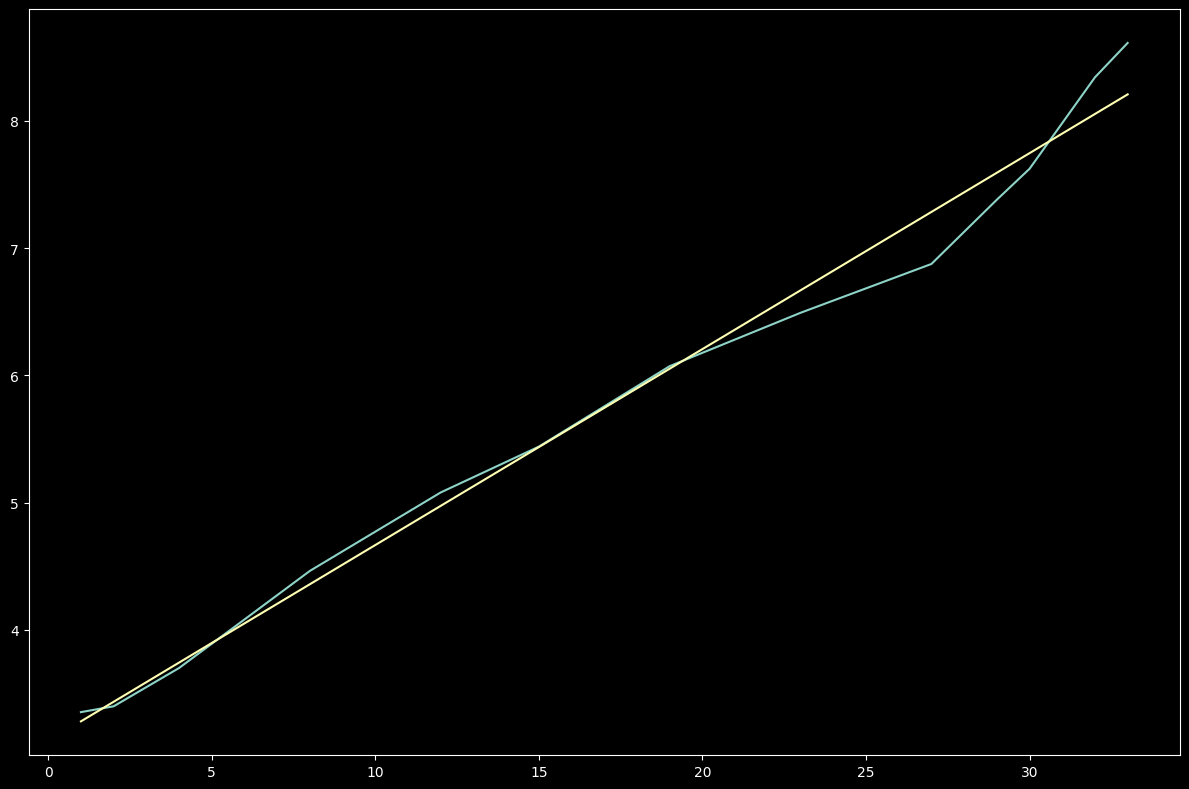

In [39]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989,
                  1993, 1997, 1999, 2000, 2002, 2003])
x = years - 1970

transistors = np.array([2250, 2500, 5000, 29000, 120000, 275000,
                        1180000, 3100000, 7500000, 24000000,
                        42000000, 220000000, 410000000])

b = np.log10(transistors)

A = np.column_stack([np.ones(len(x)), x])

theta = np.linalg.lstsq(A, b)

print(theta[0])
print(1/np.sqrt(13) * np.linalg.norm(A@theta[0] - b))
print(10**(theta[0][0] + theta[0][1]*(2015-1970)))
# print(np.dot(A, theta[0]))
plt.figure(figsize=(12, 8))
plt.plot(x, b)
plt.plot(x, np.dot(A, theta[0]))
plt.tight_layout()
plt.show()
plt.close()

### 14.6 a)

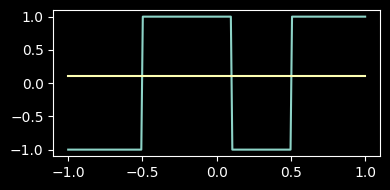

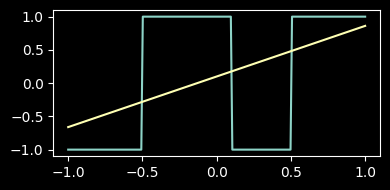

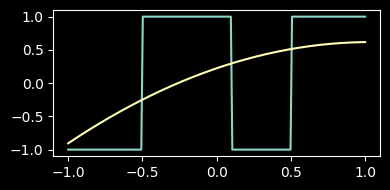

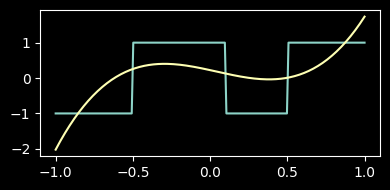

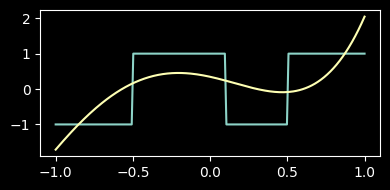

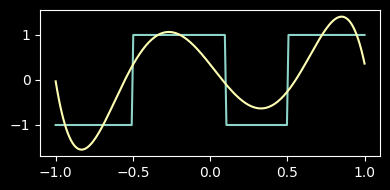

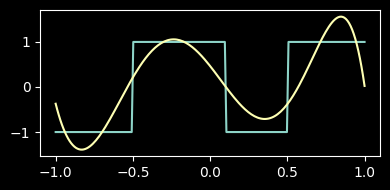

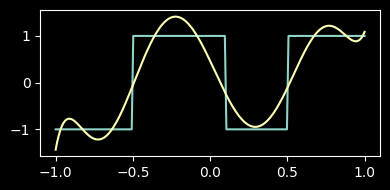

[np.float64(0.07035623639735145), np.float64(0.06304443365607607), np.float64(0.06255666796737223), np.float64(0.05446597816457652), np.float64(0.05391991492395134), np.float64(0.03761731479801347), np.float64(0.03687773862644374), np.float64(0.029354825621279477)]


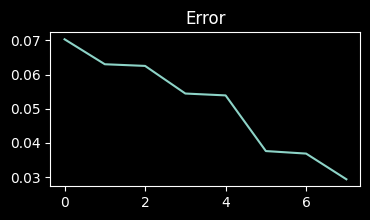

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 200
x = np.linspace(-1, 1, N)
y = np.zeros(N)

y[:] = -1
y[(x >= -0.5) & (x < 0.1) | (x >= 0.5)] = 1

col_stack = []
errors = []
for degree in range(0, 8):
    col_stack.append(x**degree)
    A = np.column_stack(col_stack)
    theta = np.linalg.lstsq(A, y)

    errors.append(np.linalg.norm(y-A@theta[0])/N)

    plt.figure(figsize=(4, 2))
    plt.plot(x, y)
    plt.plot(x, np.dot(A, theta[0]))
    plt.tight_layout()
    plt.show()

print(errors)
plt.figure(figsize=(4, 2))
plt.title("Error")
plt.plot(errors)
plt.show()
plt.close()

### 14.6 c)

결과값 똑같음

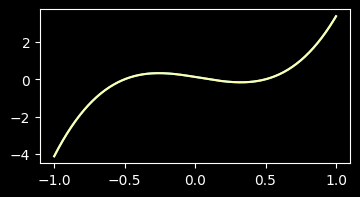

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 200
x = np.linspace(-1, 1, N)
y = 5*(x + 0.5)*(x - 0.1)*(x - 0.5)

A = np.column_stack([np.ones(len(x)), x, x**2, x**3])
theta = np.linalg.lstsq(A, y)

plt.figure(figsize=(4, 2))
plt.plot(x, y)
plt.plot(x, A@theta[0])
plt.show()
plt.close()

### 14.7

[-0.02163123  0.11696937 -0.04989651 -0.14349124  2.3387621   0.17746582]
Accuracy 0.975


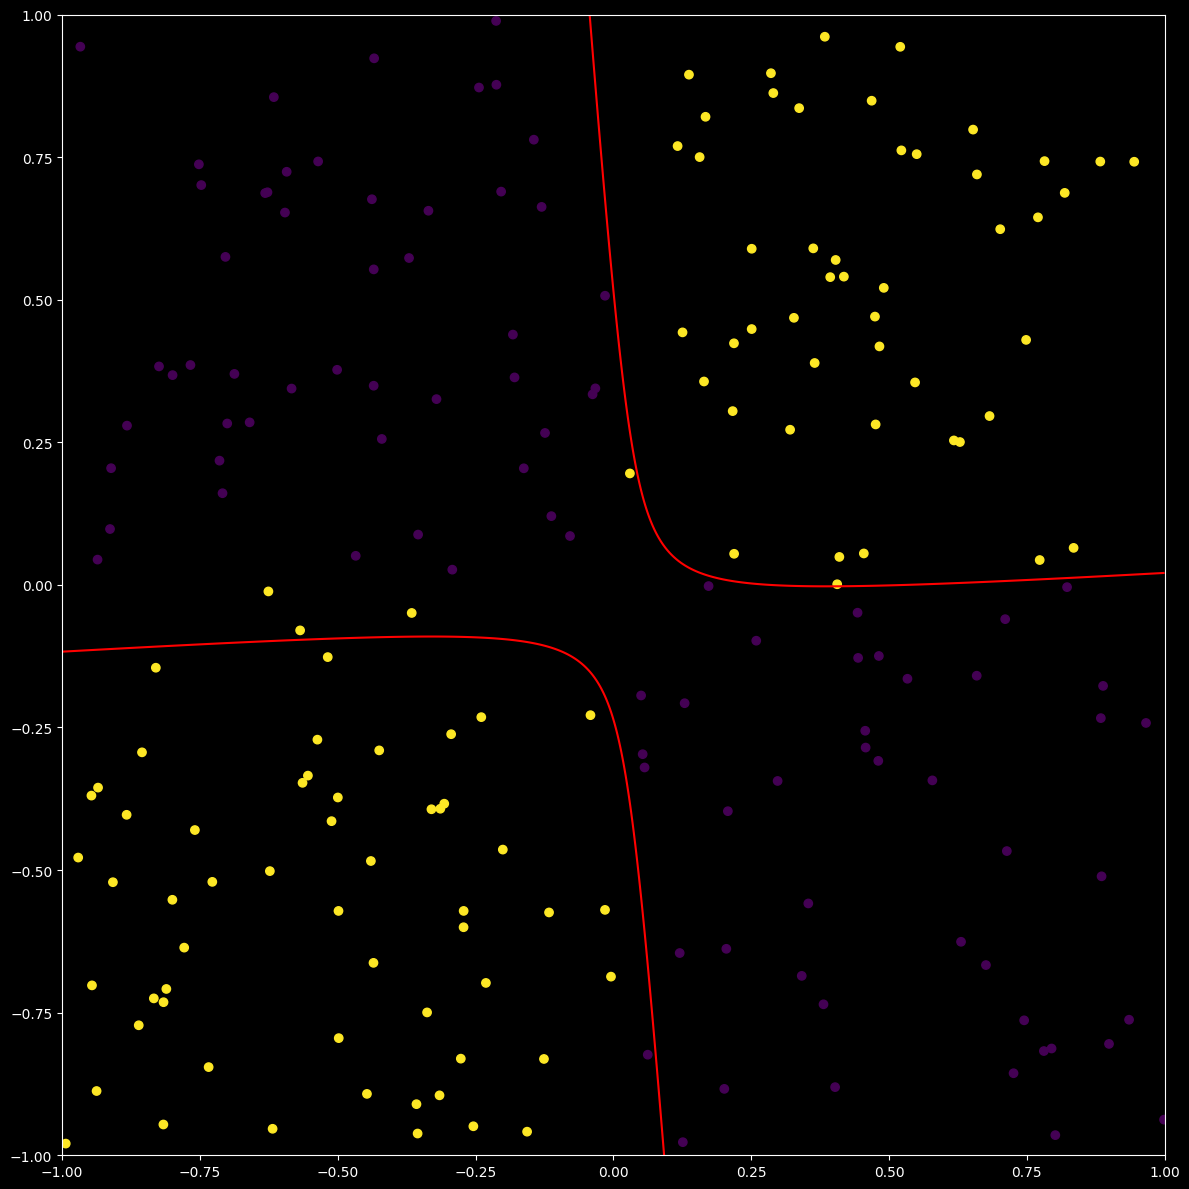

In [130]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(41)
N = 200
x = np.random.uniform(low=-1, high=1, size=(2, N))
cond = (x[0, :] * x[1, :] > 0)
y = np.where(cond, 1.0, -1.0)
x_1 = x[0,:]
x_2 = x[1,:]
A = np.column_stack([np.ones(N), x_1, x_2, x_1**2, x_1*x_2, x_2**2])
theta = np.linalg.lstsq(A, y, rcond=None)[0]
print(theta)
X1, X2 = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500))
Z = np.column_stack([
    np.ones(X1.ravel().size),
    X1.ravel(),
    X2.ravel(),
    X1.ravel()**2,
    X1.ravel() * X2.ravel(),
    X2.ravel()**2
]) @ theta
Z = Z.reshape(X1.shape)

y_tilde = np.dot(A, theta)
y_pred = np.sign(y_tilde)
print(f"Accuracy {np.mean(np.sign(y_pred) == y)}")
# print(x)
# print(y)
plt.figure(figsize=(12, 12))
plt.scatter(x_1, x_2, c=y)
plt.contour(X1, X2, Z, levels=[0], colors='red')
plt.tight_layout()
plt.show()